<a href="https://colab.research.google.com/github/youssefhesham200/Image-Noise-Reduction-with-Deep-Convolutional-Autoencoders/blob/master/AutoEncoder_for_image_noise_reducing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/test1.zip" -d "/content/test_out1" 
!unzip "/content/dog.zip" -d "/content/dogs_out"

Archive:  /content/test1.zip
  inflating: /content/test_out1/test/40_256.jpg  
  inflating: /content/test_out1/test/50_256.jpg  
  inflating: /content/test_out1/test/51_256.jpg  
  inflating: /content/test_out1/test/52_256.jpg  
  inflating: /content/test_out1/test/63_256.jpg  
Archive:  /content/dog.zip
  inflating: /content/dogs_out/dog/1_256.jpg  
  inflating: /content/dogs_out/dog/10_256.jpg  
  inflating: /content/dogs_out/dog/100_256.jpg  
  inflating: /content/dogs_out/dog/101_256.jpg  
  inflating: /content/dogs_out/dog/102_256.jpg  
  inflating: /content/dogs_out/dog/103_256.jpg  
  inflating: /content/dogs_out/dog/104_256.jpg  
  inflating: /content/dogs_out/dog/105_256.jpg  
  inflating: /content/dogs_out/dog/106_256.jpg  
  inflating: /content/dogs_out/dog/107_256.jpg  
  inflating: /content/dogs_out/dog/108_256.jpg  
  inflating: /content/dogs_out/dog/109_256.jpg  
  inflating: /content/dogs_out/dog/11_256.jpg  
  inflating: /content/dogs_out/dog/110_256.jpg  
  inflating:

In [ ]:
from PIL import Image
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import keras
from keras import layers

In [ ]:
#data load
path = "/content/dogs_out/dog/"

x_train = []

#put files into lists
for filename in os.listdir(path):
    image = Image.open(path + filename)
    image = np.array(image)
    x_train.append(image)

In [ ]:
x_train = np.array(x_train)
x_train.shape

(300, 256, 256, 3)

In [ ]:
x_train = x_train.astype('float64') / 255

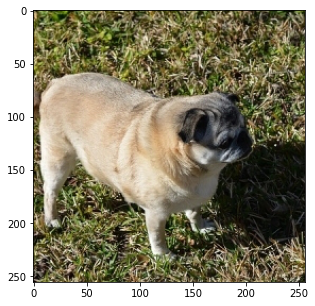

In [ ]:
def add_noise(img):
    row,col,ch= img.shape
    gauss = np.random.normal(0, 0.1**0.5,(row,col,ch)).reshape(row,col,ch)
    return np.clip(img + gauss, 0., 1.)
     

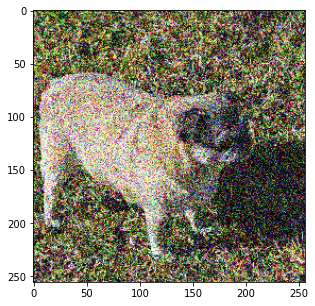

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(add_noise(x_train[8]))

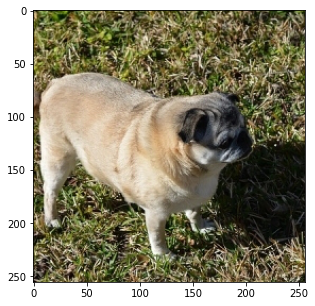

In [ ]:
y_train = x_train.copy()
plt.figure(figsize=(20, 5))
plt.imshow(y_train[8])

In [ ]:
for i in range(len(x_train)):
    x_train[i] = add_noise(x_train[i])

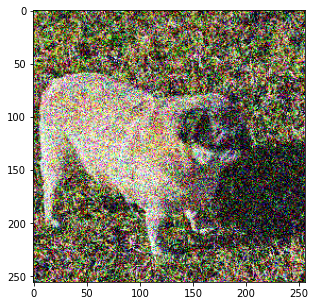

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(x_train[8])

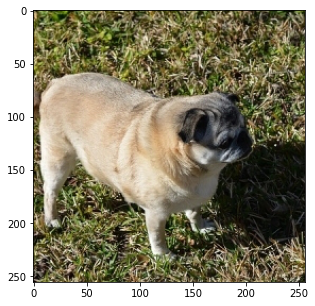

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(y_train[8])

In [ ]:
#using dense 16
input_img = keras.Input(shape=(256, 256, 3))

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

f = keras.layers.Flatten(input_shape=(x.shape[1],x.shape[2], x.shape[3]))(x)

encoded = keras.layers.Dense(16)(f)

x = keras.layers.Dense(16 * 16 * 8)(encoded)
x = keras.layers.Reshape((16, 16, 8))(x)

x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=(2,2), activation='relu', padding='same')(x)

decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624  

In [ ]:
autoencoder.fit(x_train, y_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test)
                )

Epoch 1/200
3/3 [==============================] - 20s 2s/step - loss: 0.0704
Epoch 2/200
3/3 [==============================] - 2s 629ms/step - loss: 0.0701
Epoch 3/200
3/3 [==============================] - 2s 638ms/step - loss: 0.0698
Epoch 4/200
3/3 [==============================] - 2s 638ms/step - loss: 0.0693
Epoch 5/200
3/3 [==============================] - 2s 607ms/step - loss: 0.0687
Epoch 6/200
3/3 [==============================] - 2s 626ms/step - loss: 0.0681
Epoch 7/200
3/3 [==============================] - 2s 638ms/step - loss: 0.0676
Epoch 8/200
3/3 [==============================] - 2s 650ms/step - loss: 0.0672
Epoch 9/200
3/3 [==============================] - 2s 653ms/step - loss: 0.0669
Epoch 10/200
3/3 [==============================] - 2s 637ms/step - loss: 0.0669
Epoch 11/200
3/3 [==============================] - 2s 626ms/step - loss: 0.0669
Epoch 12/200
3/3 [==============================] - 2s 623ms/step - loss: 0.0669
Epoch 13/200
3/3 [=====================

In [ ]:
#using 16 * 16 encoded
input_img = keras.Input(shape=(256, 256, 3))

x1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x1 = layers.MaxPooling2D((2, 2), padding='same')(x1)
x1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x1 = layers.MaxPooling2D((2, 2), padding='same')(x1)
x1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x1)
x1 = layers.MaxPooling2D((2, 2), padding='same')(x1)
x1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x1)
x1 = layers.MaxPooling2D((2, 2), padding='same')(x1)

encoded2 = x1

x1 = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded2)
x1 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x1)
x1 = layers.Conv2DTranspose(32, (3, 3), strides=(2,2), activation='relu', padding='same')(x1)
x1 = layers.Conv2DTranspose(64, (3, 3), strides=(2,2), activation='relu', padding='same')(x1)

decoded2 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x1)

autoencoder2 = keras.Model(input_img, decoded2)
autoencoder2.compile(optimizer='adam', loss='mean_squared_error')
autoencoder2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 16)        4624

In [ ]:
autoencoder2.fit(x_train, y_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test)
                )

Epoch 1/200
3/3 [==============================] - 3s 621ms/step - loss: 0.0704
Epoch 2/200
3/3 [==============================] - 2s 652ms/step - loss: 0.0700
Epoch 3/200
3/3 [==============================] - 2s 651ms/step - loss: 0.0694
Epoch 4/200
3/3 [==============================] - 2s 649ms/step - loss: 0.0686
Epoch 5/200
3/3 [==============================] - 2s 654ms/step - loss: 0.0678
Epoch 6/200
3/3 [==============================] - 2s 667ms/step - loss: 0.0675
Epoch 7/200
3/3 [==============================] - 2s 653ms/step - loss: 0.0669
Epoch 8/200
3/3 [==============================] - 2s 648ms/step - loss: 0.0666
Epoch 9/200
3/3 [==============================] - 2s 666ms/step - loss: 0.0662
Epoch 10/200
3/3 [==============================] - 2s 663ms/step - loss: 0.0650
Epoch 11/200
3/3 [==============================] - 2s 669ms/step - loss: 0.0627
Epoch 12/200
3/3 [==============================] - 2s 675ms/step - loss: 0.0580
Epoch 13/200
3/3 [===================

In [ ]:
encoder2 = keras.Model(input_img, encoded2)
decoder2 = keras.Model(encoded2, decoded2)

In [ ]:
#using 32 * 32 encoded

input_img = keras.Input(shape=(256, 256, 3))

x3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x3 = layers.MaxPooling2D((2, 2), padding='same')(x3)
x3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
x3 = layers.MaxPooling2D((2, 2), padding='same')(x3)
x3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
x3 = layers.MaxPooling2D((2, 2), padding='same')(x3)

encoded3 = x3

x3 = layers.Conv2DTranspose(32, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded3)
x3 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x3)
x3 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x3)


decoded3 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x3)

autoencoder3 = keras.Model(input_img, decoded3)
autoencoder3.compile(optimizer='adam', loss='mean_squared_error')
autoencoder3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        3692

In [ ]:
autoencoder3.fit(x_train, y_train,
                epochs= 200,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test)
                )

Epoch 1/200
3/3 [==============================] - 8s 1s/step - loss: 0.0705
Epoch 2/200
3/3 [==============================] - 1s 414ms/step - loss: 0.0699
Epoch 3/200
3/3 [==============================] - 2s 441ms/step - loss: 0.0687
Epoch 4/200
3/3 [==============================] - 1s 425ms/step - loss: 0.0660
Epoch 5/200
3/3 [==============================] - 1s 428ms/step - loss: 0.0611
Epoch 6/200
3/3 [==============================] - 1s 412ms/step - loss: 0.0550
Epoch 7/200
3/3 [==============================] - 1s 430ms/step - loss: 0.0505
Epoch 8/200
3/3 [==============================] - 1s 435ms/step - loss: 0.0478
Epoch 9/200
3/3 [==============================] - 1s 409ms/step - loss: 0.0449
Epoch 10/200
3/3 [==============================] - 1s 420ms/step - loss: 0.0409
Epoch 11/200
3/3 [==============================] - 1s 423ms/step - loss: 0.0358
Epoch 12/200
3/3 [==============================] - 1s 434ms/step - loss: 0.0301
Epoch 13/200
3/3 [======================

In [ ]:
encoder3 = keras.Model(input_img, encoded3)
decoder3 = keras.Model(encoded3, decoded3)

In [ ]:
#test images 
test_imgs = []
noise_test  = []
for filename in os.listdir("/content/test_out1/test"):
      image = Image.open("/content/test_out1/test/" + filename)
      test_imgs.append(np.array(image) /255)
      image = add_noise(np.array(image) /255)
      noise_test.append(image)


In [ ]:
noise_test.append(add_noise(y_train[8]))
noise_test = np.array(noise_test)
test_imgs = np.array(test_imgs)
noise_test.shape

(6, 256, 256, 3)

In [ ]:
prediction_auto_dense = autoencoder.predict(noise_test)
prediction_auto_16 = autoencoder2.predict(noise_test)
prediction_auto_32 = autoencoder3.predict(noise_test)

1/1 [==============================] - 0s 20ms/step


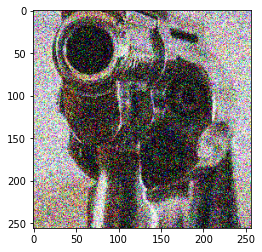

In [ ]:
plt.imshow(noise_test[0])

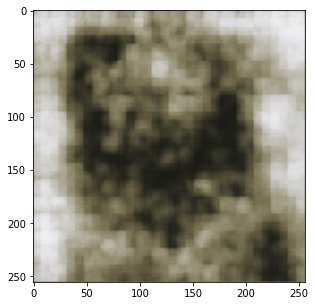

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(prediction_auto_dense[0])

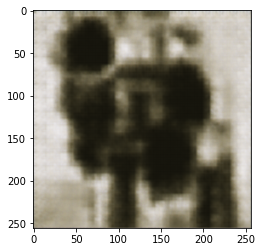

In [ ]:
plt.imshow(prediction_auto_16[0])

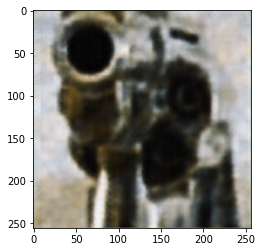

In [ ]:
plt.imshow(prediction_auto_32[0])

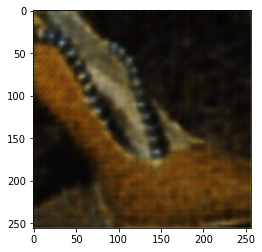

In [ ]:
plt.imshow(prediction_auto_32[3])

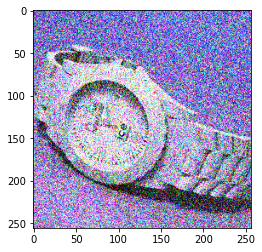

In [ ]:
plt.imshow(noise_test[1])

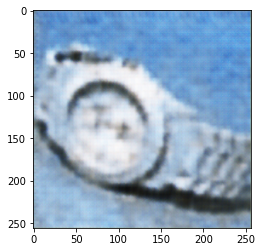

In [ ]:
plt.imshow(prediction_auto_32[1])

In [ ]:
encod2 = encoder2.predict(test_imgs)
encod3 = encoder3.predict(test_imgs)

for i in range(len(encod2)):
  encod2[i] = add_noise(encod2[i])
  encod3[i] = add_noise(encod3[i])


decod2 = decoder2.predict(encod2) 
decod3 = decoder3.predict(encod3) 

1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 0s 224ms/step


1/1 [==============================] - 0s 137ms/step


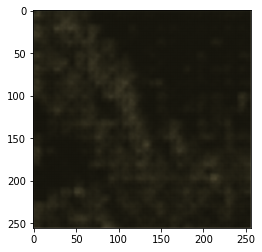

In [ ]:
plt.imshow(decod2[3])

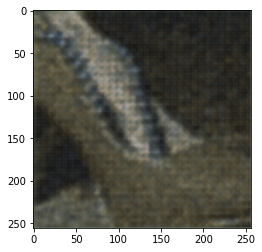

In [ ]:
plt.imshow(decod3[3])

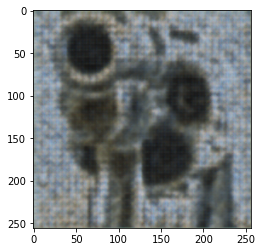

In [ ]:
plt.imshow(decod3[0])

In [ ]:
#using 64 * 64 encoded

input_img = keras.Input(shape=(256, 256, 3))

x4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x4 = layers.MaxPooling2D((2, 2), padding='same')(x4)
x4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
x4 = layers.MaxPooling2D((2, 2), padding='same')(x4)


encoded4 = x4

x4 = layers.Conv2DTranspose(32, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded4)
x4 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x4)


decoded4 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x4)

autoencoder4 = keras.Model(input_img, decoded4)
autoencoder4.compile(optimizer='adam', loss='mean_squared_error')
autoencoder4.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 128, 128, 32)     1846

In [ ]:
autoencoder4.fit(x_train, y_train,
                epochs= 200,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test)
                )

Epoch 1/200
3/3 [==============================] - 3s 582ms/step - loss: 0.0701
Epoch 2/200
3/3 [==============================] - 1s 391ms/step - loss: 0.0685
Epoch 3/200
3/3 [==============================] - 1s 427ms/step - loss: 0.0665
Epoch 4/200
3/3 [==============================] - 1s 414ms/step - loss: 0.0634
Epoch 5/200
3/3 [==============================] - 1s 426ms/step - loss: 0.0584
Epoch 6/200
3/3 [==============================] - 1s 422ms/step - loss: 0.0513
Epoch 7/200
3/3 [==============================] - 1s 415ms/step - loss: 0.0424
Epoch 8/200
3/3 [==============================] - 1s 409ms/step - loss: 0.0329
Epoch 9/200
3/3 [==============================] - 1s 410ms/step - loss: 0.0261
Epoch 10/200
3/3 [==============================] - 1s 413ms/step - loss: 0.0221
Epoch 11/200
3/3 [==============================] - 1s 427ms/step - loss: 0.0195
Epoch 12/200
3/3 [==============================] - 1s 417ms/step - loss: 0.0173
Epoch 13/200
3/3 [===================

In [ ]:
prediction_auto_64 = autoencoder4.predict(noise_test)

1/1 [==============================] - 0s 164ms/step


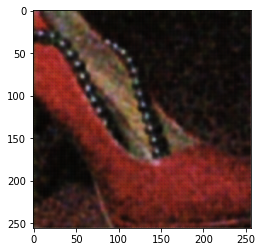

In [ ]:
plt.imshow(prediction_auto_64[3])

In [ ]:
# 32
input_img = keras.Input(shape=(256, 256, 3))

x5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x5 = layers.MaxPooling2D((2, 2), padding='same')(x5)
x5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x5)
x5 = layers.MaxPooling2D((2, 2), padding='same')(x5)
x5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x5)
x5 = layers.MaxPooling2D((2, 2), padding='same')(x5)

x5 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x5)
x5 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x5)
x5 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x5)


decoded4 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x5)

auto32 = keras.Model(input_img, decoded4)
auto32.compile(optimizer='adam', loss='mean_squared_error')
auto32.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_25 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 32)        924

In [ ]:
auto32.fit(y_train, y_train,
                epochs= 100,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test)
                )

Epoch 1/100
3/3 [==============================] - 5s 782ms/step - loss: 0.0704
Epoch 2/100
3/3 [==============================] - 1s 293ms/step - loss: 0.0700
Epoch 3/100
3/3 [==============================] - 1s 303ms/step - loss: 0.0693
Epoch 4/100
3/3 [==============================] - 1s 297ms/step - loss: 0.0684
Epoch 5/100
3/3 [==============================] - 1s 299ms/step - loss: 0.0676
Epoch 6/100
3/3 [==============================] - 1s 306ms/step - loss: 0.0667
Epoch 7/100
3/3 [==============================] - 1s 296ms/step - loss: 0.0659
Epoch 8/100
3/3 [==============================] - 1s 293ms/step - loss: 0.0648
Epoch 9/100
3/3 [==============================] - 1s 301ms/step - loss: 0.0635
Epoch 10/100
3/3 [==============================] - 1s 297ms/step - loss: 0.0618
Epoch 11/100
3/3 [==============================] - 1s 299ms/step - loss: 0.0594
Epoch 12/100
3/3 [==============================] - 1s 302ms/step - loss: 0.0562
Epoch 13/100
3/3 [===================

In [ ]:
# 16
input_img = keras.Input(shape=(256, 256, 3))

x5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x5 = layers.MaxPooling2D((2, 2), padding='same')(x5)
x5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x5)
x5 = layers.MaxPooling2D((2, 2), padding='same')(x5)
x5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x5)
x5 = layers.MaxPooling2D((2, 2), padding='same')(x5)
x5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x5)
x5 = layers.MaxPooling2D((2, 2), padding='same')(x5)

x5 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x5)
x5 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x5)
x5 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x5)
x5 = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(x5)


decoded5 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x5)

auto16 = keras.Model(input_img, decoded5)
auto16.compile(optimizer='adam', loss='mean_squared_error')
auto16.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_29 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 64, 64, 16)        462

In [ ]:
auto16.fit(y_train, y_train,
                epochs= 100,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test)
                )

Epoch 1/100
3/3 [==============================] - 3s 484ms/step - loss: 0.0705
Epoch 2/100
3/3 [==============================] - 1s 239ms/step - loss: 0.0703
Epoch 3/100
3/3 [==============================] - 1s 237ms/step - loss: 0.0700
Epoch 4/100
3/3 [==============================] - 1s 261ms/step - loss: 0.0698
Epoch 5/100
3/3 [==============================] - 1s 255ms/step - loss: 0.0695
Epoch 6/100
3/3 [==============================] - 1s 274ms/step - loss: 0.0692
Epoch 7/100
3/3 [==============================] - 1s 260ms/step - loss: 0.0688
Epoch 8/100
3/3 [==============================] - 1s 258ms/step - loss: 0.0683
Epoch 9/100
3/3 [==============================] - 1s 242ms/step - loss: 0.0676
Epoch 10/100
3/3 [==============================] - 1s 263ms/step - loss: 0.0665
Epoch 11/100
3/3 [==============================] - 1s 253ms/step - loss: 0.0651
Epoch 12/100
3/3 [==============================] - 1s 270ms/step - loss: 0.0640
Epoch 13/100
3/3 [===================

In [ ]:
# 64
input_img = keras.Input(shape=(256, 256, 3))

x5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x5 = layers.MaxPooling2D((2, 2), padding='same')(x5)
x5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x5)
x5 = layers.MaxPooling2D((2, 2), padding='same')(x5)


x5 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x5)
x5 = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x5)


decoded6 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x5)

auto64 = keras.Model(input_img, decoded6)
auto64.compile(optimizer='adam', loss='mean_squared_error')
auto64.summary()

In [ ]:
auto64.fit(y_train, y_train,
                epochs= 100,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test)
                )

Epoch 1/100
3/3 [==============================] - 2s 352ms/step - loss: 0.0699
Epoch 2/100
3/3 [==============================] - 1s 363ms/step - loss: 0.0685
Epoch 3/100
3/3 [==============================] - 1s 367ms/step - loss: 0.0668
Epoch 4/100
3/3 [==============================] - 1s 371ms/step - loss: 0.0653
Epoch 5/100
3/3 [==============================] - 1s 372ms/step - loss: 0.0638
Epoch 6/100
3/3 [==============================] - 1s 345ms/step - loss: 0.0619
Epoch 7/100
3/3 [==============================] - 1s 356ms/step - loss: 0.0596
Epoch 8/100
3/3 [==============================] - 1s 365ms/step - loss: 0.0569
Epoch 9/100
3/3 [==============================] - 1s 364ms/step - loss: 0.0540
Epoch 10/100
3/3 [==============================] - 1s 368ms/step - loss: 0.0512
Epoch 11/100
3/3 [==============================] - 1s 364ms/step - loss: 0.0487
Epoch 12/100
3/3 [==============================] - 1s 355ms/step - loss: 0.0461
Epoch 13/100
3/3 [===================

In [ ]:
pred_64 = auto64.predict(test_imgs)
pred_32 = auto32.predict(test_imgs)
pred_16 = auto16.predict(test_imgs)


1/1 [==============================] - 0s 198ms/step


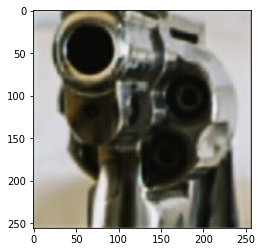

In [ ]:
plt.imshow(pred_64[0])

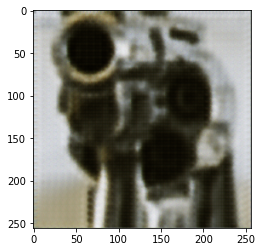

In [ ]:
plt.imshow(pred_32[0])

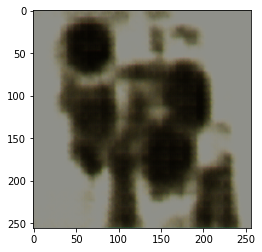

In [ ]:
plt.imshow(pred_16[0])